In [1]:
import pandas as pd
import numpy as np

In [47]:
from pandas.api.types import is_string_dtype

with open("sample_dataset.csv") as file:
        bestand = pd.read_csv(file,sep=",")

# format the headers
bestand.columns = bestand.iloc[0]
bestand = bestand.drop(bestand.index[0])

# Convert columns to floats
headers_to_float = bestand.columns[3:]
bestand[headers_to_float] = bestand[headers_to_float].astype(float)

                          PC0       PC1       PC2       PC3           PC4
0                                                                        
Silt                -0.512435 -0.347515  0.291275  0.468023 -5.592474e-01
Clay                -0.388328  0.590585  0.203537 -0.563227 -3.765087e-01
Sand                 0.585980 -0.037930 -0.324315 -0.067266 -7.385686e-01
pH                  -0.396075  0.304533 -0.813176  0.298544 -1.318390e-16
Aggregate Stability  0.293877  0.660503  0.327560  0.608339  6.938894e-18


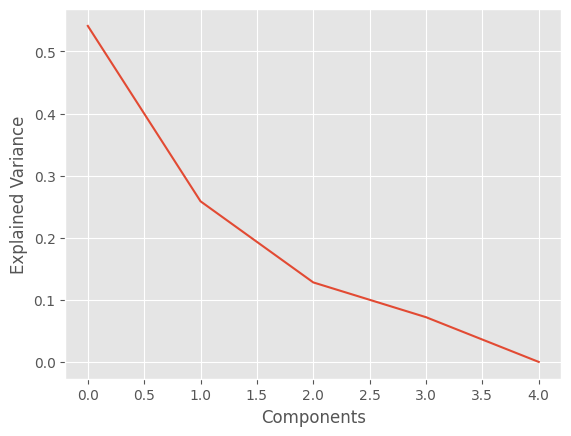

In [50]:
from sklearn.decomposition import PCA

#features to consider
features = ["Silt","Clay","Sand","pH","Aggregate Stability"]

values = bestand.loc[:, features]
# standardize
values = (values - values.mean()) / values.std()

pca_soil = PCA(n_components=values.shape[1])
pca_soil.fit(values)

# Reformat and view results
loadings = pd.DataFrame(pca_soil.components_.T,
columns=['PC%s' % _ for _ in range(len(values.columns))],
index=values.columns)
print(loadings)

plt.plot(pca_soil.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

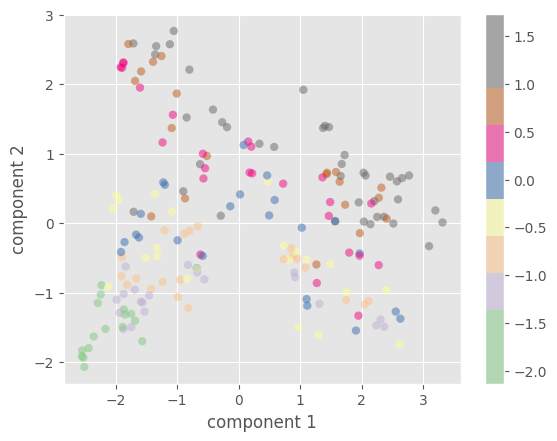

In [53]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(values)

plt.scatter(projected[:, 0], projected[:, 1],
            c=values["Aggregate Stability"], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


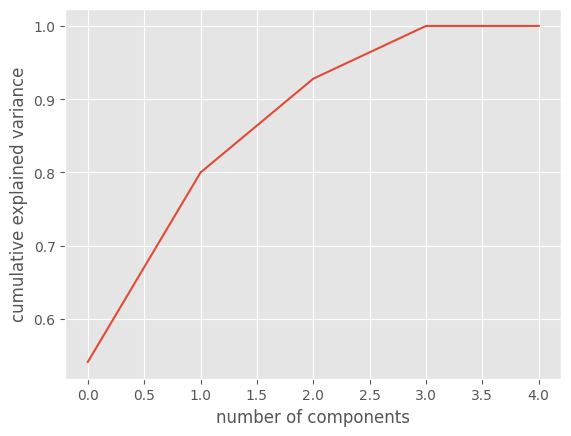

In [55]:
pca = PCA().fit(values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [63]:
#https://shankarmsy.github.io/posts/pca-sklearn.html
print(pca.components_)
#Trying to decipher the meaning of the principal components
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, values.columns)))

print("Explained variance per PC:",pca.explained_variance_ratio_)

[[-5.12434831e-01 -3.88328195e-01  5.85980471e-01 -3.96074621e-01
   2.93876741e-01]
 [-3.47514512e-01  5.90584964e-01 -3.79298838e-02  3.04533403e-01
   6.60502683e-01]
 [ 2.91275399e-01  2.03537161e-01 -3.24314509e-01 -8.13176198e-01
   3.27560432e-01]
 [ 4.68022700e-01 -5.63226790e-01 -6.72661353e-02  2.98544423e-01
   6.08339403e-01]
 [-5.59247353e-01 -3.76508725e-01 -7.38568601e-01 -1.31838984e-16
   6.93889390e-18]]
Meaning of the 2 components:
-0.51 x Silt + -0.39 x Clay + 0.59 x Sand + -0.40 x pH + 0.29 x Aggregate Stability
-0.35 x Silt + 0.59 x Clay + -0.04 x Sand + 0.30 x pH + 0.66 x Aggregate Stability
0.29 x Silt + 0.20 x Clay + -0.32 x Sand + -0.81 x pH + 0.33 x Aggregate Stability
0.47 x Silt + -0.56 x Clay + -0.07 x Sand + 0.30 x pH + 0.61 x Aggregate Stability
-0.56 x Silt + -0.38 x Clay + -0.74 x Sand + -0.00 x pH + 0.00 x Aggregate Stability
Explained variance per PC: [5.41193527e-01 2.58686462e-01 1.28071307e-01 7.20487048e-02
 1.26999864e-32]
